In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plot

In [3]:
import numpy as np

In [4]:
pd.set_option('display.max_rows',557)

In [5]:
import csv


list_word_dict = []

with open("idNames_official.csv", 'r') as file:
    csv_file = csv.DictReader(file)
    #putting the identifier name in a dictionary    
    for row in csv_file:
        word_dict = {}
        dict_row = dict(row)
        #splitin
        id_name = dict_row['Identifier Name']
        words = id_name.split()
       #indicating the index of the word 
        for i in range(len(words)):
            word_dict.update({words[i]: i+1})
           
        list_word_dict.append(word_dict)
    #print(list_word_dict)


    
    
result = []
for i in range(len(list_word_dict)):
    result.append([key + "_" + str(val) for key, val in list_word_dict[i].items(  )])
#print(result)


flat_list = []
for sublist in result:
    for item in sublist:
        flat_list.append(item)
        flat_list.sort()

        my_dict = {i:flat_list.count(i) for i in flat_list}

#print(my_dict)



df = pd.DataFrame(my_dict.items())


In [6]:
df

,0,1
0,0_2,1
1,1254_2,1
2,1_2,3
3,1_3,1
4,2_2,1
...,...,...
553,within_1,1
554,worst_1,1
555,wrapper_1,1
556,x_1,2


In [7]:
df_new = df.rename(columns={0: 'NameANDPosition', 1: 'Frequency'})
df_new

,NameANDPosition,Frequency
0,0_2,1
1,1254_2,1
2,1_2,3
3,1_3,1
4,2_2,1
...,...,...
553,within_1,1
554,worst_1,1
555,wrapper_1,1
556,x_1,2


In [8]:
df_new[['Name','Position']] = df_new.NameANDPosition.str.split("_", expand=True,)

In [9]:
df_new

,NameANDPosition,Frequency,Name,Position
0,0_2,1,0,2
1,1254_2,1,1254,2
2,1_2,3,1,2
3,1_3,1,1,3
4,2_2,1,2,2
...,...,...,...,...
553,within_1,1,within,1
554,worst_1,1,worst,1
555,wrapper_1,1,wrapper,1
556,x_1,2,x,1


In [10]:
#df_new.plot.bar(x="Name", y="Frequency", rot=65, title="Frequency of Names in Positions");

#plot.show(block=True);
#data.goupby(['position'])

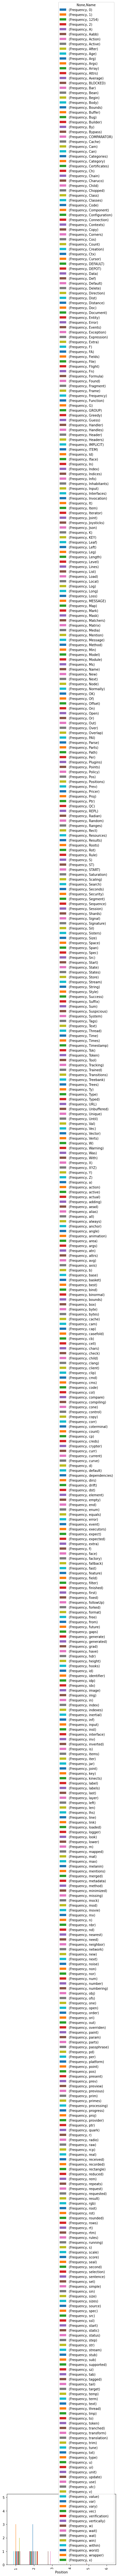

In [16]:
#df_new.plot(kind='bar', x='Name', y='Frequency')
df_new.groupby(['Position', 'Name']).sum().unstack().plot(kind='bar')